## Boston AirBnB open data with the CRISP-DM (Cross Industry Process for Data Mining)

To get general AirBnB business insight, the Boston data from AirBnB will be analyzed based on the CRISP-DM. The subprocesses of the CRISP-DM are written below.

`1`. Business Understanding

`2`. Data Understanding

`3`. Prepare Data

`4`. Data Modeling

`5`. Evaluate the Results

`6`. Deploy

In [94]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar #To check holidays in the U.S
import time
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [74]:
# Load the AirBnB files
df_listing = pd.read_csv('./listings.csv')
df_calendar = pd.read_csv('./calendar.csv')
df_reviews = pd.read_csv('./reviews.csv')

## 1. Business Understanding

Business Questions 
    - What are the most relevant features of the groups over the 90 percentile and under the 10 percentile?
    - What are the most relevant features to be cared for the two traveler group and more than four traveler group?
    - How is the price of AirBnb adjusted in terms of seasons and locations?

## 2. Data Understanding

Check and play around the dataframes loaded before to get some idea or to get the business quesations progressed.
### 2.1. For df_listing

In [75]:
# Setting option for seeing the whole columns of dataframes
pd.set_option('display.max_columns', None)  

In [76]:
print(df_listing.shape)
df_listing.head(n=5)

(3585, 95)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

In [77]:
df_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

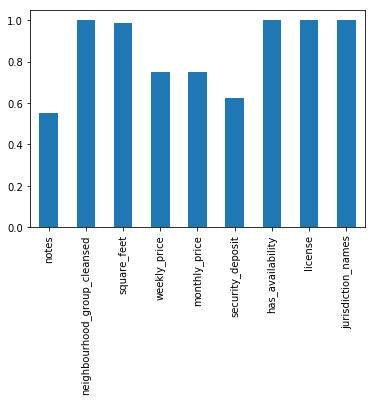

In [78]:
# Checking the columns consisting of missing values over 50%
df_missing = df_listing.isna().mean()
df_missing[df_missing>0.5].plot.bar()

In [79]:
print("# of id:",df_listing.id.unique().size)
print("# of host_id:",df_listing.host_id.unique().size)
# There are some hosts who take care of more than two ids

# of id: 3585
# of host_id: 2181


# of accommodates: [ 4  2  3  5  1  8  6 16  7  9 10 12 11 14]
2     0.413668
4     0.181311
1     0.122455
3     0.119386
5     0.068340
6     0.056625
8     0.015342
7     0.010879
10    0.005300
9     0.002789
12    0.001395
11    0.001116
14    0.000837
16    0.000558
Name: accommodates, dtype: float64
Accomodates equal or less than 2 is 53.61 %
Accomodates more than 2 is 42.57 %


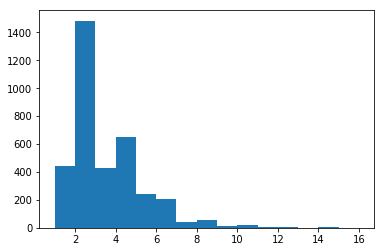

In [80]:
print("# of accommodates:",df_listing.accommodates.unique())
tmp = df_listing.accommodates.value_counts(ascending=False)/df_listing.accommodates.size
print(tmp)
print("Accomodates equal or less than 2 is {:5.2f} %".format((tmp[1]+tmp[2])*100))
print("Accomodates more than 2 is {:5.2f} %".format((tmp[3]+tmp[4]+tmp[5]+tmp[6])*100))
# 96% of total id can be categorized into the group with less than 2 people or the group with more than 2 people
plt.hist(df_listing.accommodates, bins=15)
plt.show()

In [81]:
print("# of bed_type:",df_listing.bed_type.unique())

# of bed_type: ['Real Bed' 'Pull-out Sofa' 'Futon' 'Airbed' 'Couch']


### 2.2. For df_calendar

(1308890, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
listing_id    1308890 non-null int64
date          1308890 non-null object
available     1308890 non-null object
price         643037 non-null object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB
None


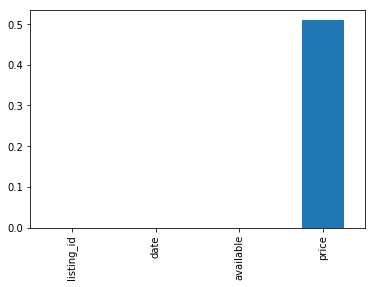

In [82]:
print(df_calendar.shape)
print(df_calendar.info())
df_calendar.head()
df_missing_calendar = df_calendar.isna().mean()
df_missing_calendar.plot.bar()

In [83]:
# Modify df_calendar for future work
# Special event : marathon, new academic season

def modify_calendar(df_calendar):
    '''
    This function creates 'year', 'month', 'day', 'weekday',  and 'week_number' columns from 'date' coulmn of df_calendar 
    and remove '$' string from 'price' coulmn.
    
    Input : a Pandas dataframe having a date data column
    Output : a Pandas dataframe having year, month, day, weekday, us_holiday columns
    '''
    # Split date column into year, month,day, weekday columns
    # The day of the week with Monday=0, Sunday=6
    # Set the range of weekends from Friday to Sunday
    df_calendar['year'] = pd.DatetimeIndex(df_calendar['date']).year
    df_calendar['month'] = pd.DatetimeIndex(df_calendar['date']).month
    df_calendar['day'] = pd.DatetimeIndex(df_calendar['date']).day
    df_calendar['weekday'] = pd.DatetimeIndex(df_calendar['date']).weekday
    df_calendar['week_number'] = pd.DatetimeIndex(df_calendar['date']).week
    df_calendar['price']= df_calendar['price'].str.replace('$','')
    df_calendar['price']=df_calendar['price'].str.replace(',','')
    df_calendar['price'] = df_calendar['price'].astype(float)
    
    # Add us_holiday column
    cal = calendar()
    holidays = cal.holidays(start=df_calendar.date.min(), end=df_calendar.date.max())
    df_calendar['us_holiday'] = df_calendar.date.astype('datetime64').isin(holidays)
    
    # Add weekend column #Friday, Saturday
    weekend = [4,5]
    df_calendar['weekend'] = df_calendar.weekday.isin(weekend)
    
    # Replace values in weekday column 
    df_calendar['weekday'].replace({0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday',4:'Friday', 5:'Saturday', 6:'Sunday'}, inplace=True)
    
    return df_calendar

In [84]:
df_cal_modified = modify_calendar(df_calendar)
print(df_cal_modified.shape[0]/365)

# Each listing_id has 365 rows

3586.0


In [85]:
def add_availabledays_price(df_listing, df_cal_modified):
    '''
    This function creates columns of 'unavail_days', 'avail_days_weekends', 
    'avail_days_weekdays', 'price_weekend', and 'price_weekday' where calculated from df_cal_modified on df_listing.
    
    Input : 
    - A Pandas dataframe made from 'listings.csv' : df_listing
    - A pandas dataframe modified by modify_calendar() : df_cal_modified
    
    Output :
    - the modified df_listing dataframe with new 'unavail_days', 'avail_days_weekends',
    'avail_days_weekdays', 'price_weekend', and 'price_weekday' columns 
    '''
    id_list = df_listing.id[:]
    unavailable_days_array = np.array([])
    avail_days_weekends_array =  np.array([])
    avail_days_weekdays_array = np.array([])
    price_weekend_array = np.array([])
    price_weekday_array = np.array([])

    for i in np.nditer(id_list):
        tmp = df_cal_modified[(df_cal_modified.listing_id == i)] # Make a dataframe coming from df_listing with a certain id
        available_dict = tmp.available.value_counts().to_dict()
        if 'f' in available_dict:
            unavailable_days = tmp[tmp.available == 'f'].shape[0]
        else:
            unavailable_days = 0

        if 't' in available_dict:
            available_weekends = tmp[(tmp.available == 't') & (tmp.weekend == True)].shape[0]
            available_weekdays = tmp[(tmp.available == 't') & (tmp.weekend == False)].shape[0]
            price_weekend = tmp[(tmp.weekend == True) & (tmp.available == 't')].price.astype(float).describe()['mean']
            price_weekday = tmp[(tmp.weekend == False) & (tmp.available == 't')].price.astype(float).describe()['mean']

        else:
            available_weekends = 0
            available_weekdays = 0
            price_weekend = np.nan
            price_weekday = np.nan


        unavailable_days_array = np.append(unavailable_days_array, unavailable_days)
        avail_days_weekends_array = np.append(avail_days_weekends_array, available_weekends)
        avail_days_weekdays_array = np.append(avail_days_weekdays_array, available_weekdays)
        price_weekend_array = np.append(price_weekend_array, price_weekend)
        price_weekday_array = np.append(price_weekday_array, price_weekday)

    df_listing['unavail_days'] = pd.Series(unavailable_days_array)
    df_listing['avail_days_weekends'] = pd.Series(avail_days_weekends_array)
    df_listing['avail_days_weekdays'] = pd.Series(avail_days_weekdays_array)
    df_listing['price_weekend'] = pd.Series(price_weekend_array)
    df_listing['price_weekday'] = pd.Series(price_weekday_array)


In [86]:
start = time.time() 
add_availabledays_price(df_listing, df_cal_modified)
print("time :", time.time() - start)
df_listing.tail(n=10)

time : 57.58891701698303


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,unavail_days,avail_days_weekends,avail_days_weekdays,price_weekend,price_weekday
3575,5280827,https://www.airbnb.com/rooms/5280827,20160906204935,2016-09-07,Private cozy room,"Cozy room near T station. 5 min walking to T, ...",NaN,"Cozy room near T station. 5 min walking to T, ...",none,NaN,NaN,NaN,NaN,NaN,1. No damage to the house or furniture 2. No S...,https://a2.muscache.com/im/pictures/116bc87c-8...,https://a2.muscache.com/im/pictures/116bc87c-8...,https://a2.muscache.com/im/pictures/116bc87c-8...,https://a2.muscache.com/im/pictures/116bc87c-8...,19246369,https://www.airbnb.com/users/show/19246369,Joe,2014-07-31,"Somerville, Massachusetts, United States",NaN,within an hour,96%,100%,f,https://a2.muscache.com/im/users/19246369/prof...,https://a2.muscache.com/im/users/19246369/prof...,Somerville,28,28,"['email', 'phone', 'reviews', 'jumio']",t,t,"Washington Street, Somerville, MA 02143, Unite...",Somerville,Charlestown,NaN,Somerville,MA,02143,Boston,"Somerville, MA",US,United States,42.382681,-71.085720,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",NaN,$69.00,NaN,NaN,$95.00,NaN,1,$24.00,2,1125,a week ago,NaN,25,51,81,356,2016-09-06,6,2015-03-07,2016-08-20,70.0,8.0,7.0,9.0,10.0,8.0,7.0,f,NaN,NaN,t,strict,f,f,8,0.33,9.0,101.0,255.0,75.000000,69.000000
3576,14689681,https://www.airbnb.com/rooms/14689681,20160906204935,2016-09-07,Beautiful loft style bedroom with large bathroom,You'd be living on the top floor of a four sto...,NaN,You'd be living on the top floor of a four sto...,none,NaN,NaN,NaN,NaN,NaN,NaN,https://a2.muscache.com/im/pictures/725a70f0-a...,https://a2.muscache.com/im/pictures/725a70f0-a...,https://a2.muscache.com/im/pictures/725a70f0-a...,https://a2.muscache.com/im/pictures/725a70f0-a...,50546418,https://www.airbnb.com/users/show/50546418,Thomas,2015-12-04,"Somerville, Massachusetts, United States",NaN,within a day,100%,100%,f,https://a2.muscache.com/im/pictures/f44ebd43-8...,https://a2.muscache.com/im/pictures/f44ebd43-8...,Cambridge,1,1,"['email', 'phone', 'reviews', 'jumio']",t,t,"Putnam Avenue, Cambridge, MA 02139, United States",Cambridge,Allston,NaN,Cambridge,MA,02139,Boston,"Cambridge, MA",US,United States,42.365112,-71.114801,t,House,Private room,2,1.0,1.0,1.0,Real Bed,"{""Air Conditioning"",Kitchen,""Indoor Fireplace""...",NaN,$124.00,NaN,NaN,$200.00,$85.00,1,$0.00,2,1125,2 weeks ago,NaN,5,5,20,110,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,flexible,f,f,1,NaN,255.0,32.0,78.0,152.875000,131.820513
3577,13750763,https://www.airbnb.com/rooms

In [87]:
print(df_listing.shape)
df_listing.info()

(3585, 100)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 100 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url              

## 3. Prepare data

## Strategies
    - Remove irrelevant columns
    - Change object type columns to numeric columns or manipulate them using one hot encoding
    - Nan 채우기
    - integrated_score 만들기


In [110]:
def clean_listing_df(df_listing):
    '''
    This function removes irrelevant columns in the df_listing dataframe.

    Input : 
    - A Pandas dataframe made from 'listings.csv' : df_listing

    Output :
    - Cleaned df_listing
    '''
    # Drop columns having 50% of nan value
    df_missing = df_listing.isna().mean()
    df_listing_modi1 = df_listing.drop(df_missing[df_missing>0.5].index.to_list(), axis=1)
    # Drop columns related with urls and other irrelevant columns
    remove_list1 = ['listing_url', 'scrape_id', 'last_scraped', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_url', 
                'host_thumbnail_url', 'host_picture_url', 'country_code', 'country']
    df_listing_modi1.drop(remove_list1, axis=1, inplace=True)
    # Drop the columns because of data overlap [city, smart_location], Only one value [state], 
    # Wrong data [market, calendar_last_scraped]
    remove_list2 = ['smart_location', 'state', 'name', 'summary', 'space', 'description','neighborhood_overview',
                'transit','access','market','calendar_last_scraped']
    df_listing_modi1.drop(remove_list2, axis=1, inplace=True)
    
    # Modify 'house_rules' columns to 'house_rules_exist_tf' having True value if there is a rule.
    # False value, if there is no rule.
    df_listing_modi1['house_rules_exist_tf']= pd.notna(df_listing_modi1.house_rules)
    df_listing_modi1.drop(['house_rules'], axis=1, inplace=True)
    # Remove columns having 1000 unique string valuses and irrelevant data
    remove_list3 = ['interaction', 'host_name', 'host_since', 'host_about', 'street','first_review','experiences_offered','requires_license',
                    'last_review','host_location','neighbourhood_cleansed','experiences_offered','requires_license']
    df_listing_modi2 = df_listing_modi1.drop(remove_list3, axis=1)

    # Change the columns 'host_response_rate', 'host_acceptance_rate' to float type
    columns_change_type = ['host_response_rate','host_acceptance_rate', 'price', 'cleaning_fee']
    for i in columns_change_type:
        df_listing_modi2[i] = df_listing_modi2[i].str.replace('%','')
        df_listing_modi2[i] = df_listing_modi2[i].str.replace('$','')
        df_listing_modi2[i] = df_listing_modi2[i].str.replace(',','')
        df_listing_modi2[i] = df_listing_modi2[i].astype(float)
    
    # Modify and Split values in 'amenities' column
    df_listing_modi2.amenities = df_listing_modi2.amenities.str.replace("[{}]", "")
    df_amenities = df_listing_modi2.amenities.str.get_dummies(sep = ",")
    df_amenities = df_amenities.add_prefix('amenities_')
    df_listing_modi2 = pd.concat([df_listing_modi2, df_amenities], axis=1)
    df_listing_modi2 = df_listing_modi2.drop('amenities', axis=1)
    
    # Use get_dummies for columns having unique values less then 10
    columns_of_object_less10 =[]
    for i,j in zip(df_listing_modi2.columns.to_list(), df_listing_modi2.dtypes.to_list()):
        if j == object and len(df_listing_modi2[i].value_counts()) < 10 :
            columns_of_object_less10.append(i)
    df_listing_modi2 = pd.get_dummies(df_listing_modi2, columns=columns_of_object_less10, prefix=columns_of_object_less10, 
                                      dummy_na=True)
    
    #  Modify 'extra_people' coulmn to get boolean type of 'extra_people_fee_tf'
    df_listing_modi2['extra_people'] = df_listing_modi2['extra_people'].astype(str)
    df_listing_modi2['extra_people']= df_listing_modi2['extra_people'].str.replace('$','')
    df_listing_modi2['extra_people']=df_listing_modi2['extra_people'].str.replace(',','')
    df_listing_modi2['extra_people'] = df_listing_modi2['extra_people'].astype(float)
    df_listing_modi2['extra_people'] = df_listing_modi2['extra_people'].replace(to_replace=0, value=np.nan)
    df_listing_modi2['extra_people_fee_tf']= pd.notna(df_listing_modi2.extra_people)
    df_listing_modi2 = df_listing_modi2.drop('extra_people', axis=1)
    
    # Modify and Split values in 'host_verifications' column
    df_listing_modi2.host_verifications = df_listing_modi2.host_verifications.str.replace("[", "")
    df_listing_modi2.host_verifications = df_listing_modi2.host_verifications.str.replace("]", "")
    df_host_verifications = df_listing_modi2.host_verifications.str.get_dummies(sep = ",")
    df_host_verifications = df_host_verifications.add_prefix('host_verification_')
    df_listing_modi2 = pd.concat([df_listing_modi2, df_host_verifications], axis=1)
    df_listing_modi2 =  df_listing_modi2.drop(['host_verifications'], axis=1)
    df_listing_modi2 =  df_listing_modi2.drop(['host_neighbourhood'], axis=1)
    
    # Modify 'calendar_updated' column
    df_listing_modi2["calendar_updated_1weekago"] = np.where(df_listing_modi2['calendar_updated'].str.contains(
        "days|yesterday|today|a week ago")==True, 'yes', 'more_than_1week')
    df_listing_modi2 =  df_listing_modi2.drop(['calendar_updated'], axis=1)
    
    # Use get_dummies for the columns 'neighbourhood', 'city', 'zipcode', 'property_type'
    tmp = df_listing_modi2.columns.to_list()
    tmp1 = df_listing_modi2.dtypes.to_list()
    columns_of_object_over10 =[]
    for i,j in zip(tmp,tmp1):
            if j == object and len(df_listing_modi2[i].value_counts()) > 10 :
                columns_of_object_over10.append(i)
                
    df_listing_modi2 = pd.get_dummies(df_listing_modi2, columns=columns_of_object_over10, 
                                      prefix=columns_of_object_over10, dummy_na=True)
    
    df_listing_modi2 = pd.get_dummies(df_listing_modi2, columns=['calendar_updated_1weekago','house_rules_exist_tf','extra_people_fee_tf'], 
                                  prefix=['calendar_updated_1weekago','house_rules_exist_tf','extra_people_fee_tf'], dummy_na=True)
    
    df_listing_modi2["host_response_rate_100"] = np.where(df_listing_modi2['host_response_rate'] ==100, True, False)
    df_listing_modi2["host_acceptance_rate_100"] = np.where(df_listing_modi2['host_acceptance_rate'] ==100, True, False)
    df_listing_modi2 =  df_listing_modi2.drop(['host_response_rate','host_acceptance_rate','reviews_per_month'], axis=1)
    
    #bathrooms, bedrooms, beds, cleaning_fee, review_scores_rating, review_... : : fillna with mean value
    columns1 = ['bathrooms','bedrooms','beds','cleaning_fee','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
            'review_scores_communication','review_scores_location','review_scores_value']
    df_listing_modi2[columns1] = df_listing_modi2[columns1].fillna(df_listing_modi2.mean())
    df_listing_modi2.price_weekend.fillna(df_listing_modi2.price, inplace=True)
    df_listing_modi2.price_weekday.fillna(df_listing_modi2.price, inplace=True)
    df_listing_modi2['integrated_score_log'] = np.log(df_listing_modi2['review_scores_rating']*df_listing_modi2['number_of_reviews']+1)
    
    df_listing_modi2 = pd.get_dummies(df_listing_modi2, columns=['host_response_rate_100','host_acceptance_rate_100'], 
                                  prefix=['host_response_rate_100','host_acceptance_rate_100'])
    df_listing_modi2 = df_listing_modi2.drop(['id', 'host_id', 'latitude', 'longitude','price'], axis=1)
    
    
    
    return df_listing_modi2


    
        

In [111]:
# columns_change_type = ['host_response_rate','host_acceptance_rate', 'price', 'cleaning_fee']
# for i in columns_change_type:
#     print(df_listing[i].head())
df_listing_modi2 = clean_listing_df(df_listing)  
print(df_listing_modi2.shape)


(3585, 271)


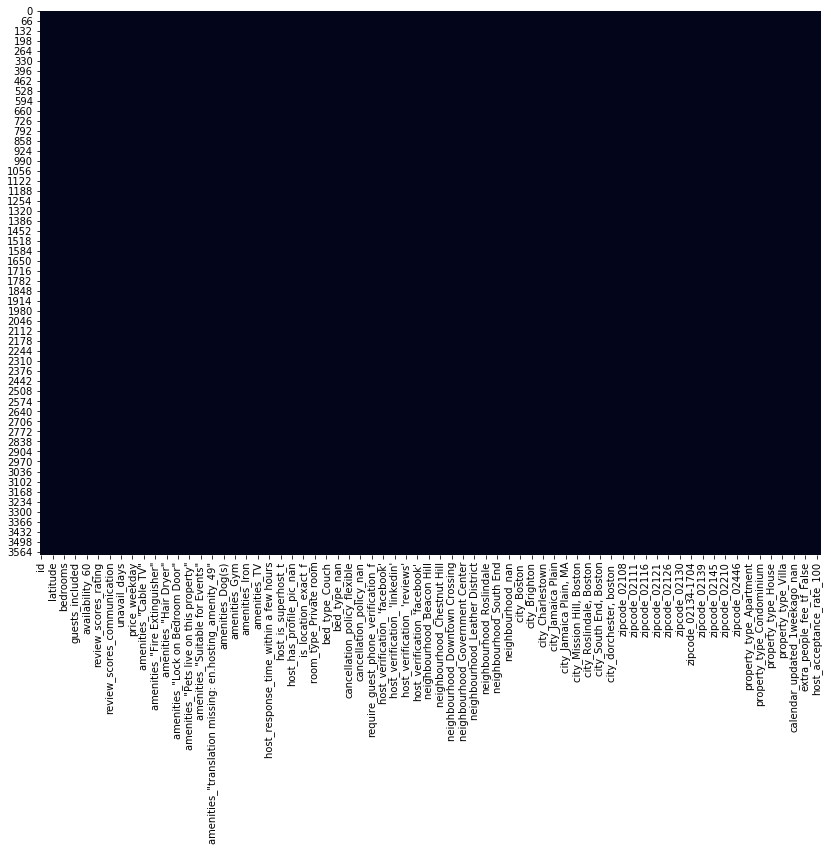

In [90]:
plt.figure(figsize=(14, 10))
sns.heatmap(df_listing_modi2.isnull(), cbar=False)

In [112]:
check_null=list(df_listing_modi2.isnull().sum())
print(check_null)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [113]:
df_listing_modi2.head()

,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,cleaning_fee,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,unavail_days,avail_days_weekends,avail_days_weekdays,price_weekend,price_weekday,"amenities_""24-Hour Check-in""","amenities_""Air Conditioning""","amenities_""Buzzer/Wireless Intercom""","amenities_""Cable TV""","amenities_""Carbon Monoxide Detector""","amenities_""Elevator in Building""","amenities_""Family/Kid Friendly""","amenities_""Fire Extinguisher""","amenities_""First Aid Kit""","amenities_""Free Parking on Premises""","amenities_""Free Parking on Street""","amenities_""Hair Dryer""","amenities_""Hot Tub""","amenities_""Indoor Fireplace""","amenities_""Laptop Friendly Workspace""","amenities_""Lock on Bedroom Door""","amenities_""Other pet(s)""","amenities_""Paid Parking Off Premises""","amenities_""Pets Allowed""","amenities_""Pets live on this property""","amenities_""Safety Card""","amenities_""Smoke Detector""","amenities_""Smoking Allowed""","amenities_""Suitable for Events""","amenities_""Washer / Dryer""","amenities_""Wheelchair Accessible""","amenities_""Wireless Internet""","amenities_""translation missing: en.hosting_amenity_49""","amenities_""translation missing: en.hosting_amenity_50""",amenities_Breakfast,amenities_Cat(s),amenities_Dog(s),amenities_Doorman,amenities_Dryer,amenities_Essentials,amenities_Gym,amenities_Hangers,amenities_Heating,amenities_Internet,amenities_Iron,amenities_Kitchen,amenities_Pool,amenities_Shampoo,amenities_TV,amenities_Washer,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_time_nan,host_is_superhost_f,host_is_superhost_t,host_is_superhost_nan,host_has_profile_pic_f,host_has_profile_pic_t,host_has_profile_pic_nan,host_identity_verified_f,host_identity_verified_t,host_identity_verified_nan,is_location_exact_f,is_location_exact_t,is_location_exact_nan,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,room_type_nan,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,bed_type_nan,instant_bookable_f,instant_bookable_t,instant_bookable_nan,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_nan,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_profile_picture_nan,require_guest_phone_verification_f,require_guest_phone_verification_t,require_guest_phone_verification_nan,host_verification_ 'amex',host_verification_ 'facebook',host_verification_ 'google',host_verification_ 'jumio',host_verification_ 'kba',host_verification_ 'linkedin',host_verification_ 'manual_offline',host_verification_ 'manual_online',host_verification_ 'phone',host_verification_ 'reviews',host_verification_ 'sent_id',host_verification_ 'weibo',host_verification_'email',host_verification_'facebook',host_verification_'phone',neighbourhood_Allston-Brighton,neighbourhood_Back Bay,neighbourhood_Beacon Hill,neighbourhood_Brookline,neighbourhood_Cambridge,neighbourhood_Charlestown,neighbourhood_Chestnut Hill,neighbourhood_Chinatown,neighbourhood_Dorchester,neighbourhood_Downtown,neighbourhood_Downtown Crossing,neighbourhood_East Boston,neighbourhood_Fenway/Kenmore,neighbourhood_Financial District,neighbourhood_Government Center,neighbourhood_Harvard Square,neighbourhood_Hyde Park,neighbourhood_Jamaica Plain,neighbourhood_Leather District,neighbourhood_Mattapan,neighbourhood_Mission Hill,neighbourhood_North End,neighbourhood_Roslindale,neighbourhood_Roxbury,neighbourhood_Somerville,neighbourhood_South Boston,neighbourhood_South End,neigh

In [107]:
# df_listing_modi2 = pd.get_dummies(df_listing_modi2, columns=['host_response_rate_100','host_acceptance_rate_100'], 
#                                   prefix=['host_response_rate_100','host_acceptance_rate_100'])
# df_listing_modi2.head()
df_listing_modi2.host_total_listings_count.value_counts()

1      1616
2       498
3       220
4       157
749     136
5        85
7        83
558      79
6        67
313      61
363      58
11       54
52       50
24       48
22       45
18       33
8        28
307      25
15       25
30       24
12       24
13       22
16       21
37       20
21       17
14       15
20       14
10       14
122      13
17       11
9        10
28        8
0         2
71        1
45        1
Name: host_total_listings_count, dtype: int64

In [114]:
df_listing_modi2.integrated_score_log.describe()


count    3585.000000
mean        5.325527
std         3.041916
min         0.000000
25%         4.531703
50%         6.175867
75%         7.566828
max        10.358155
Name: integrated_score_log, dtype: float64

In [115]:
# Apply feature scaling to the general population demographics data.
scaler = StandardScaler()
column_list = list(df_listing_modi2.columns)
scaled_values = scaler.fit_transform(df_listing_modi2.values)
df_listing_scaled = pd.DataFrame(scaled_values, index=df_listing_modi2.index, columns=df_listing_modi2.columns)

In [116]:
df_listing_scaled

,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,cleaning_fee,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,unavail_days,avail_days_weekends,avail_days_weekdays,price_weekend,price_weekday,"amenities_""24-Hour Check-in""","amenities_""Air Conditioning""","amenities_""Buzzer/Wireless Intercom""","amenities_""Cable TV""","amenities_""Carbon Monoxide Detector""","amenities_""Elevator in Building""","amenities_""Family/Kid Friendly""","amenities_""Fire Extinguisher""","amenities_""First Aid Kit""","amenities_""Free Parking on Premises""","amenities_""Free Parking on Street""","amenities_""Hair Dryer""","amenities_""Hot Tub""","amenities_""Indoor Fireplace""","amenities_""Laptop Friendly Workspace""","amenities_""Lock on Bedroom Door""","amenities_""Other pet(s)""","amenities_""Paid Parking Off Premises""","amenities_""Pets Allowed""","amenities_""Pets live on this property""","amenities_""Safety Card""","amenities_""Smoke Detector""","amenities_""Smoking Allowed""","amenities_""Suitable for Events""","amenities_""Washer / Dryer""","amenities_""Wheelchair Accessible""","amenities_""Wireless Internet""","amenities_""translation missing: en.hosting_amenity_49""","amenities_""translation missing: en.hosting_amenity_50""",amenities_Breakfast,amenities_Cat(s),amenities_Dog(s),amenities_Doorman,amenities_Dryer,amenities_Essentials,amenities_Gym,amenities_Hangers,amenities_Heating,amenities_Internet,amenities_Iron,amenities_Kitchen,amenities_Pool,amenities_Shampoo,amenities_TV,amenities_Washer,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_time_nan,host_is_superhost_f,host_is_superhost_t,host_is_superhost_nan,host_has_profile_pic_f,host_has_profile_pic_t,host_has_profile_pic_nan,host_identity_verified_f,host_identity_verified_t,host_identity_verified_nan,is_location_exact_f,is_location_exact_t,is_location_exact_nan,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,room_type_nan,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,bed_type_nan,instant_bookable_f,instant_bookable_t,instant_bookable_nan,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_nan,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_profile_picture_nan,require_guest_phone_verification_f,require_guest_phone_verification_t,require_guest_phone_verification_nan,host_verification_ 'amex',host_verification_ 'facebook',host_verification_ 'google',host_verification_ 'jumio',host_verification_ 'kba',host_verification_ 'linkedin',host_verification_ 'manual_offline',host_verification_ 'manual_online',host_verification_ 'phone',host_verification_ 'reviews',host_verification_ 'sent_id',host_verification_ 'weibo',host_verification_'email',host_verification_'facebook',host_verification_'phone',neighbourhood_Allston-Brighton,neighbourhood_Back Bay,neighbourhood_Beacon Hill,neighbourhood_Brookline,neighbourhood_Cambridge,neighbourhood_Charlestown,neighbourhood_Chestnut Hill,neighbourhood_Chinatown,neighbourhood_Dorchester,neighbourhood_Downtown,neighbourhood_Downtown Crossing,neighbourhood_East Boston,neighbourhood_Fenway/Kenmore,neighbourhood_Financial District,neighbourhood_Government Center,neighbourhood_Harvard Square,neighbourhood_Hyde Park,neighbourhood_Jamaica Plain,neighbourhood_Leather District,neighbourhood_Mattapan,neighbourhood_Mission Hill,neighbourhood_North End,neighbourhood_Roslindale,neighbourhood_Roxbury,neighbourhood_Somerville,neighbourhood_South Boston,neighbourhood_South End,neigh